# TimeSeries Analysis

### Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
dataset_path = 'drive/My Drive/path-to-data/Gaza-And-West-Bank-School-enrollment-tertiary.csv'

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv(dataset_path)
data

,Date,Value,Change
0,2019,43.24,-2.30
1,2018,44.25,1.33
2,2017,43.67,-0.58
3,2016,43.92,-3.00
4,2015,45.28,1.17
5,2014,44.76,-2.38
6,2013,45.85,-5.40
7,2012,48.47,-2.52
8,2011,49.72,3.94
9,2010,47.83,2.95


In [ ]:
data = data.drop('Change', axis=1)

In [ ]:
data

,Date,Value
0,2019,43.24
1,2018,44.25
2,2017,43.67
3,2016,43.92
4,2015,45.28
5,2014,44.76
6,2013,45.85
7,2012,48.47
8,2011,49.72
9,2010,47.83




---



### Visualization

In [ ]:
import matplotlib.pyplot as plt

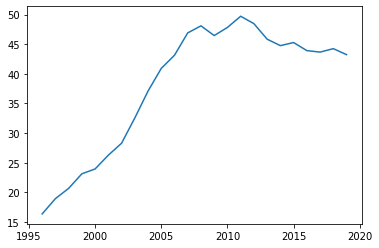

In [ ]:
plt.plot(data['Date'], data['Value'])



---



### Modeling

1. make date as date format
2. rename columns (Date -> ds , Value -> y)
3. training
4. future prediction dataframe
5. testing
6. evaluation

Date format

In [ ]:
data['Date'] = data['Date'].map(str) + '-09-15'

In [ ]:
data

,Date,Value
0,2019-09-15,43.24
1,2018-09-15,44.25
2,2017-09-15,43.67
3,2016-09-15,43.92
4,2015-09-15,45.28
5,2014-09-15,44.76
6,2013-09-15,45.85
7,2012-09-15,48.47
8,2011-09-15,49.72
9,2010-09-15,47.83


Rename cols

In [ ]:
data = data.rename(columns={'Date':'ds' , 'Value':'y'})

In [ ]:
data.columns

Index(['ds', 'y'], dtype='object')

Training

In [ ]:
import fbprophet

In [ ]:
data_prophet = fbprophet.Prophet(changepoint_prior_scale=20, changepoint_range=0.8, weekly_seasonality=False, daily_seasonality=False)

In [ ]:
data_prophet.fit(data)

INFO:fbprophet:n_changepoints greater than number of observations. Using 18.


Future Predictions

In [ ]:
data_forecast = data_prophet.make_future_dataframe(periods=5, freq='Y')

Testing

In [ ]:
data_forecast = data_prophet.predict(data_forecast)



---



Text(0.5, 1.0, 'After Prediction')

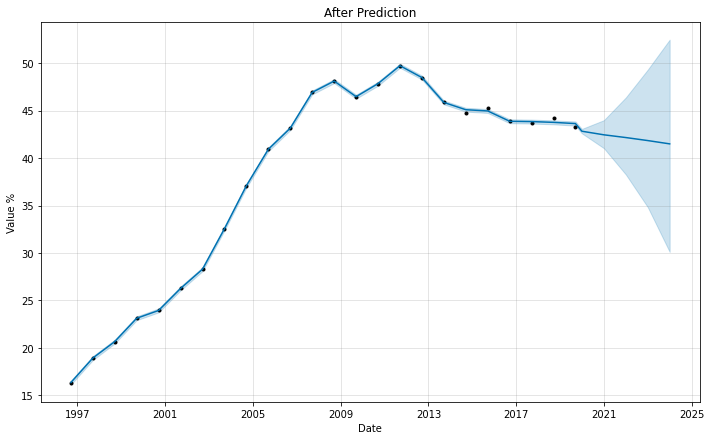

In [ ]:
data_prophet.plot(data_forecast, xlabel='Date', ylabel='Value %')
plt.title('After Prediction')



---



### Evaluation

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
import numpy as np

In [ ]:
results = cross_validation(data_prophet, initial=str(14*365)+' Days' , period=str(1*365)+' Days' , horizon=str(4*365)+' Days')

INFO:fbprophet:Making 6 forecasts with cutoffs between 2010-09-17 00:00:00 and 2015-09-16 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 12.
INFO:fbprophet:n_changepoints greater than number of observations. Using 13.
INFO:fbprophet:n_changepoints greater than number of observations. Using 14.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [ ]:
def mean_absolute_percentage_error (y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(results.y, results.yhat)

In [ ]:
mape

7.534068339406358